In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
penguins = pd.read_csv("C:/Users/gayat/OneDrive/Desktop/randomwalk-ds-assessment-level2/dataset.csv")

missing_data = penguins.isnull().sum()
print("Missing Data:\n", missing_data)

penguins_cleaned = penguins.dropna()

missing_data_cleaned = penguins_cleaned.isnull().sum()
print("\nAfter Cleaning:\n", missing_data_cleaned)

penguins_cleaned.reset_index(drop=True, inplace=True)

penguins_cleaned.head()

Missing Data:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

After Cleaning:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [5]:
gentoo_penguins = penguins_cleaned[penguins_cleaned['species'] == 'Gentoo']
avg_bm = gentoo_penguins['body_mass_g'].mean()
print(f"Average body mass of Gentoo penguins: {avg_bm:.2f}")

Average body mass of Gentoo penguins: 5159.15


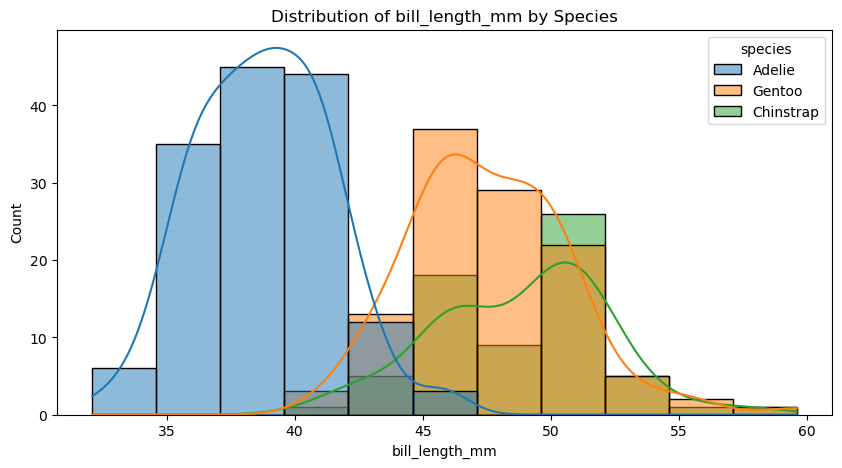

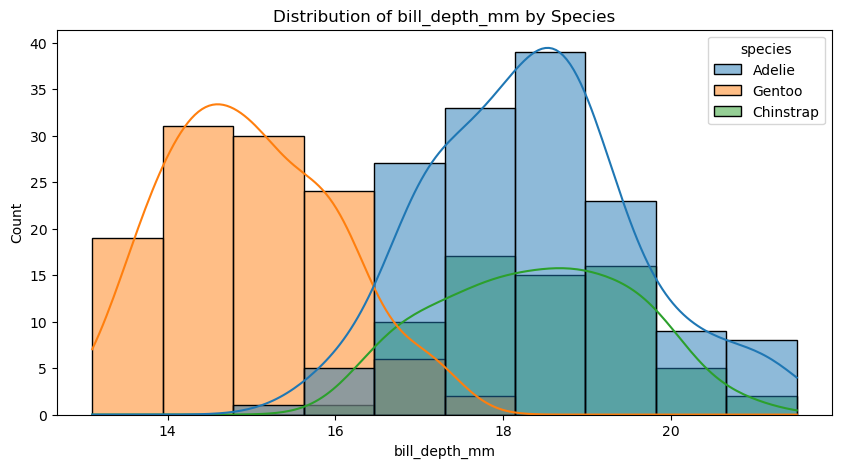

In [6]:
for feature in ['bill_length_mm', 'bill_depth_mm']:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=penguins_cleaned, x=feature, hue="species", kde=True)
    plt.title(f'Distribution of {feature} by Species')
    plt.show()

In [20]:
for species in penguins_cleaned['species'].unique():
    for feature in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
        feature_data = penguins_cleaned[penguins_cleaned['species'] == species][feature].dropna()
        print(f"{species} - {feature}: Skewness = {skew(feature_data):.2f}, Kurtosis = {kurtosis(feature_data):.2f}")

Adelie - bill_length_mm: Skewness = 0.15, Kurtosis = -0.15
Adelie - bill_depth_mm: Skewness = 0.30, Kurtosis = -0.09
Adelie - flipper_length_mm: Skewness = -0.06, Kurtosis = 0.09
Adelie - body_mass_g: Skewness = 8.63, Kurtosis = 90.35
Gentoo - bill_length_mm: Skewness = 0.64, Kurtosis = 1.16
Gentoo - bill_depth_mm: Skewness = 0.32, Kurtosis = -0.59
Gentoo - flipper_length_mm: Skewness = 0.39, Kurtosis = -0.63
Gentoo - body_mass_g: Skewness = 5.28, Kurtosis = 42.32
Chinstrap - bill_length_mm: Skewness = -0.09, Kurtosis = -0.03
Chinstrap - bill_depth_mm: Skewness = 0.00, Kurtosis = -0.90
Chinstrap - flipper_length_mm: Skewness = 0.13, Kurtosis = -0.23
Chinstrap - body_mass_g: Skewness = 5.67, Kurtosis = 38.48



Outliers for bill_length_mm:
 Series([], Name: bill_length_mm, dtype: float64)

Outliers for bill_depth_mm:
 Series([], Name: bill_depth_mm, dtype: float64)

Outliers for flipper_length_mm:
 Series([], Name: flipper_length_mm, dtype: float64)

Outliers for body_mass_g:
 67     15000.0
195    12000.0
303    10000.0
Name: body_mass_g, dtype: float64


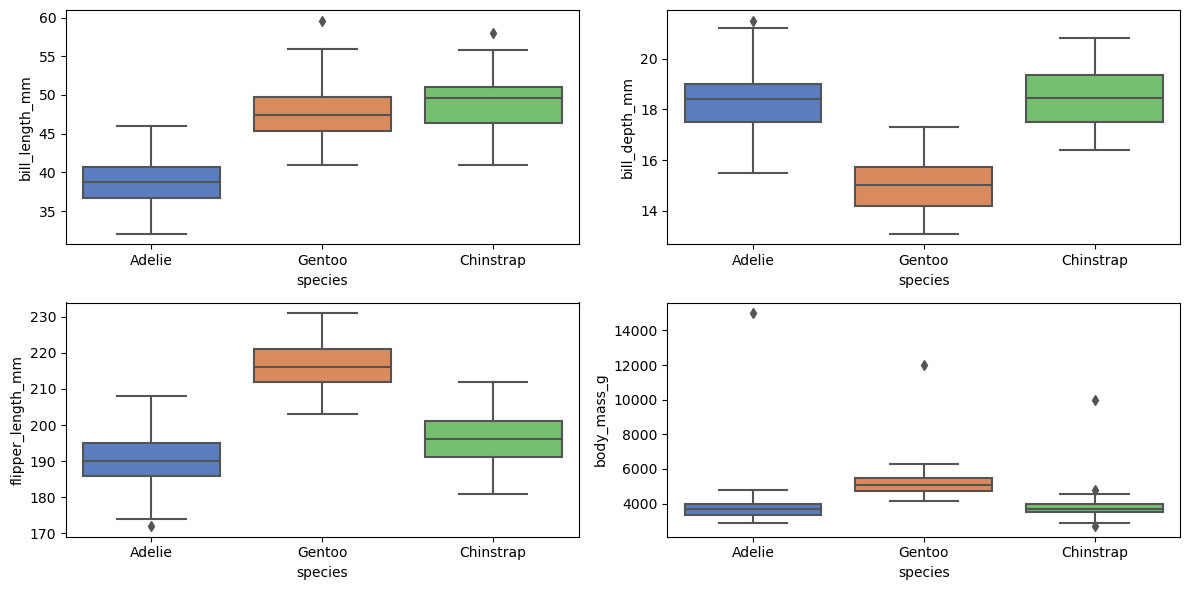

In [21]:
def Outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

plt.figure(figsize=(12, 6))

for feature in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    plt.subplot(2, 2, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'].index(feature) + 1)
    sns.boxplot(x='species', y=feature, data=penguins_cleaned, palette="muted")
    outliers = Outliers(penguins_cleaned, feature)
    print(f"\nOutliers for {feature}:\n", outliers[feature])

plt.tight_layout()
plt.show()

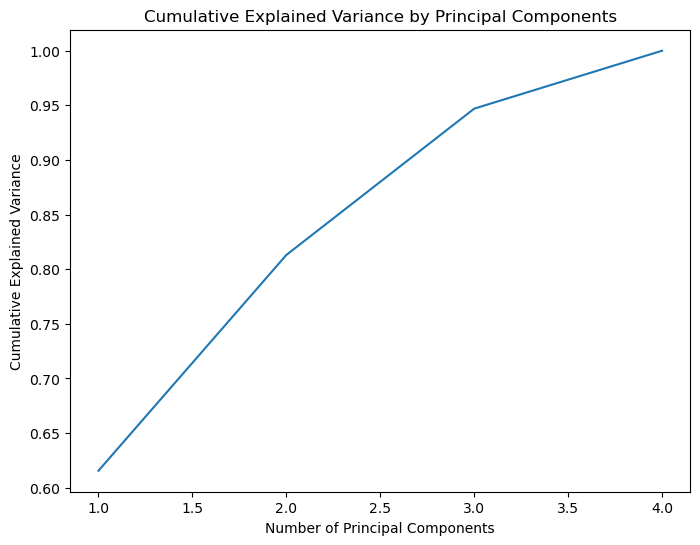

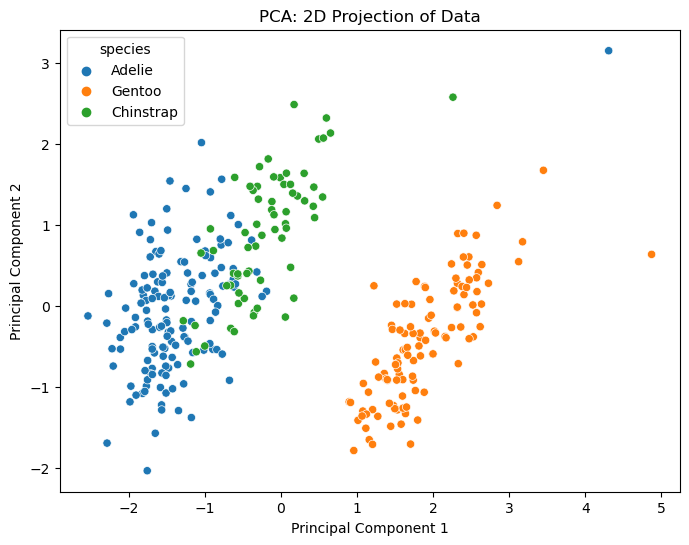

In [22]:
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(penguins_cleaned[numerical_features])

pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, len(numerical_features) + 1), y=np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

pca_2d = PCA(n_components=2)
reduced_data = pca_2d.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=penguins_cleaned['species'])
plt.title("PCA: 2D Projection of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

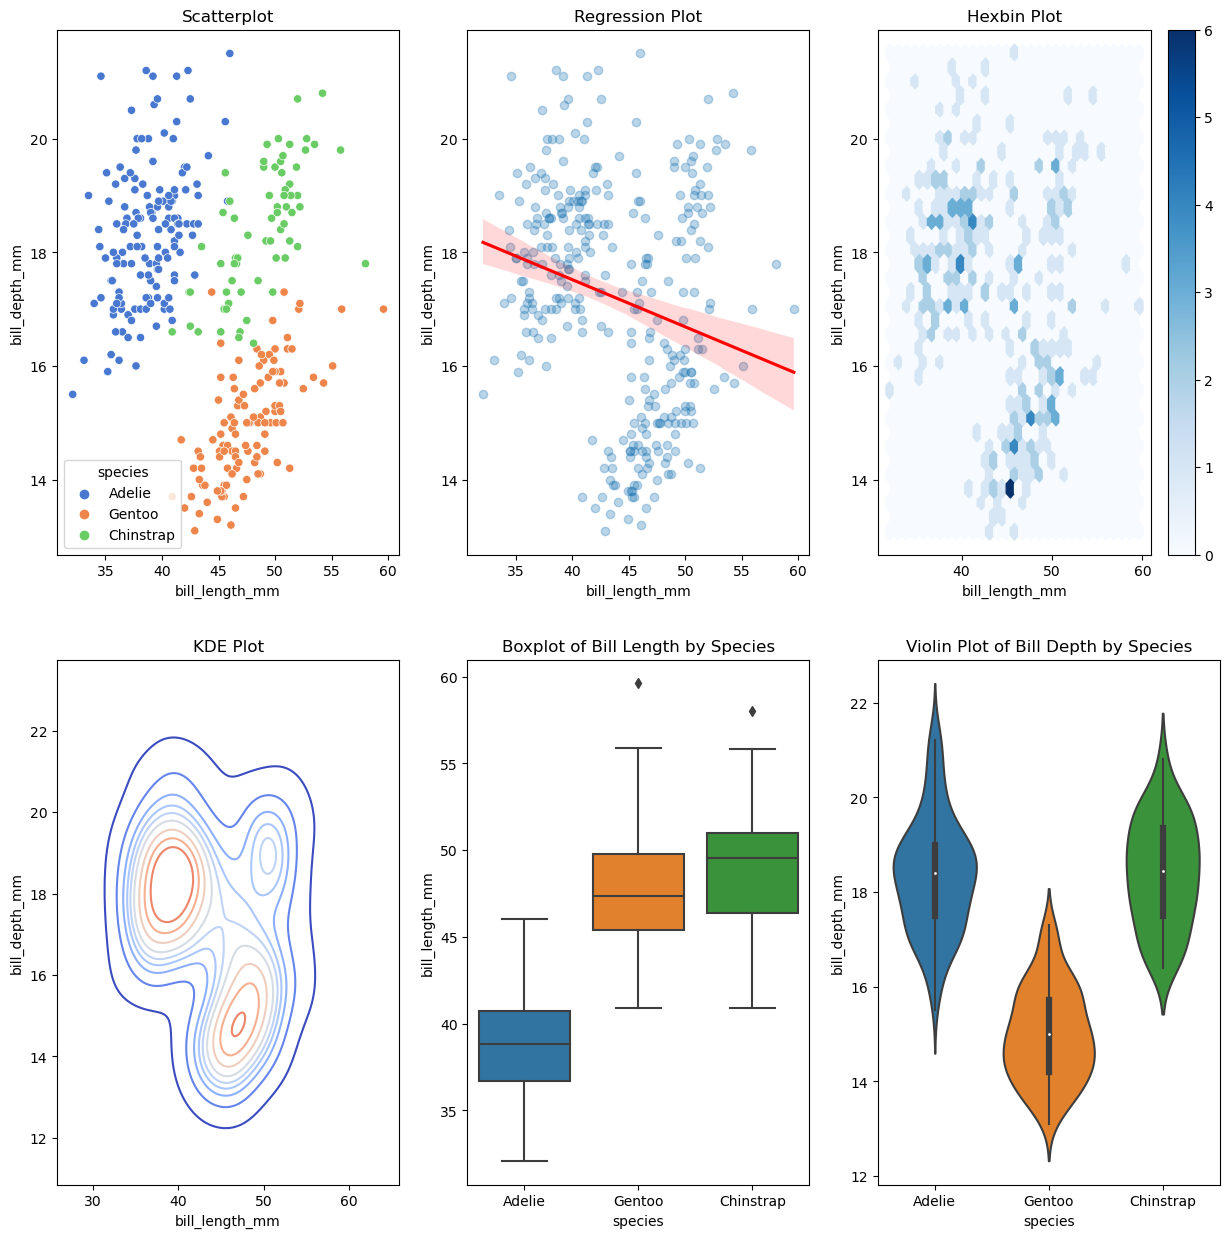

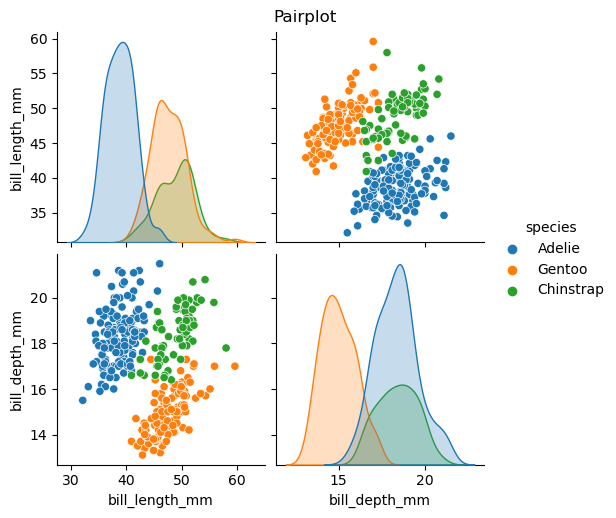

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins_cleaned, hue="species", palette="muted", ax=axes[0, 0])
axes[0, 0].set_title("Scatterplot")

sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=penguins_cleaned, ax=axes[0, 1], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[0, 1].set_title("Regression Plot")

hb = axes[0, 2].hexbin(penguins_cleaned['bill_length_mm'], penguins_cleaned['bill_depth_mm'], gridsize=30, cmap="Blues")
axes[0, 2].set_title("Hexbin Plot")
axes[0, 2].set_xlabel("bill_length_mm")
axes[0, 2].set_ylabel("bill_depth_mm")
fig.colorbar(hb,ax=axes[0,2])

sns.kdeplot(x="bill_length_mm", y="bill_depth_mm", data=penguins_cleaned, cmap="coolwarm", fill=False, ax=axes[1,0])
axes[1,0].set_title("KDE Plot")

sns.boxplot(x="species", y="bill_length_mm", data=penguins_cleaned, ax=axes[1,1])
axes[1,1].set_title("Boxplot of Bill Length by Species")

sns.violinplot(x="species", y="bill_depth_mm", data=penguins_cleaned, ax=axes[1,2])
axes[1,2].set_title("Violin Plot of Bill Depth by Species")

sns.pairplot(penguins_cleaned[['bill_length_mm', 'bill_depth_mm', 'species']], hue="species")
plt.suptitle("Pairplot",y=1.02)

plt.show()

In [24]:
max_flipper_length = penguins_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

print(max_flipper_length)

longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

print(longest_flippers)

     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              202.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              202.0


In [25]:
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = StandardScaler()
pc = penguins_cleaned.copy()
pc.loc[:, numeric_columns] = scaler.fit_transform(pc[numeric_columns])

print(pc[numeric_columns].head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.873115       0.768343          -1.415643    -0.459514
1       -0.800309       0.104774          -1.056111    -0.415366
2       -0.654696       0.411037          -0.408954    -0.900986
3       -1.309955       1.074606          -0.552767    -0.724397
4       -0.836712       1.738175          -0.768486    -0.547808
